In [2]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline

from collections import Counter

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [4]:
df = pd.read_csv('./ViewExportAccident.csv')
df

C:\Users\fiona.havelock\AppData\Local\Temp\ipykernel_16704\1805488976.py:1: DtypeWarning: Columns (0,2,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\fiona.havelock\\Documents\\FinalProject\\ViewExportAccident.csv')


,accidentIndex,accidentYear,accidentReference,locationEasting,locationNorthing,longitude,latitude,PoliceForceDescription,AccidentSeverityDescription,numVehicles,...,PedestrianCrossingPhysicalFacilitiesDescription,LightConditionsDescription,WeatherConditionsDescription,RoadSurfaceConditionsDescription,SpecialConditionsAtSiteDescription,CarriagewayHazardsDescription,UrbanOrRuralDescription,PoliceAttendanceDescription,TrunkRoadDescription,lsoaOfAccident
0,198316L031292,1983,16L031292,510300,433820,-0.327216,53.789020,Humberside,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
1,198316L031351,1983,16L031351,510600,434100,-0.322565,53.791472,Humberside,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
2,198316L040117,1983,16L040117,511400,434100,-0.310426,53.791301,Humberside,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Snowing no high winds,Snow,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
3,198316L040174,1983,16L040174,511100,433800,-0.315086,53.788670,Humberside,Slight,2,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
4,198316L040449,1983,16L040449,511300,433300,-0.312232,53.784135,Humberside,Serious,2,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703897,2020430367428,2020,430367428,486557,179552,-0.754173,51.508281,Thames Valley,Slight,2,...,Zebra,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01016560
8703898,2020430367897,2020,430367897,485234,229029,-0.761129,51.953239,Thames Valley,Slight,2,...,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Wet or damp,None,None,Rural,Yes,Non-trunk,E01017669
8703899,2020430368085,2020,430368085,494120,182368,-0.644478,51.532387,Thames Valley,Slight,2,...,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01016453
8703900,2020430368561,2020,430368561,496841,179447,-0.606065,51.505670,Thames Valley,Slight,2,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01016464


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703902 entries, 0 to 8703901
Data columns (total 35 columns):
 #   Column                                           Dtype  
---  ------                                           -----  
 0   accidentIndex                                    object 
 1   accidentYear                                     int64  
 2   accidentReference                                object 
 3   locationEasting                                  int64  
 4   locationNorthing                                 int64  
 5   longitude                                        float64
 6   latitude                                         float64
 7   PoliceForceDescription                           object 
 8   AccidentSeverityDescription                      object 
 9   numVehicles                                      int64  
 10  numCasualties                                    int64  
 11  accidentDate                                     object 
 12  DayOfWeekDescr

In [10]:
london = df[df['accidentYear']>2005]

In [12]:
#Focus on London
london = df.loc[df['LocalAuthorityONSDescription'].isin(['Camden', 'City of London', 'Hackney', 'Hammersmith and Fulham','Haringey', 'Kensington and Chelsea', 'Lambeth', 'Lewisham', 'Newham', 'Southwark', 'Tower Hamlets', 'Wandsworth', 'Westminster',
'Barking and Dagenham','Barnet', 'Bexley', 'Brent', 'Bromley', 'Croydon', 'Ealing', 'Greenwich', 'Harrow', 'Havering', 'Hillingdon', 'Kingston upon Thames', 
'Merton''Redbridge', 'Richmond upon Thames', 'Sutton', 'Waltham Forest' ])]

In [14]:
london

,accidentIndex,accidentYear,accidentReference,locationEasting,locationNorthing,longitude,latitude,PoliceForceDescription,AccidentSeverityDescription,numVehicles,...,PedestrianCrossingPhysicalFacilitiesDescription,LightConditionsDescription,WeatherConditionsDescription,RoadSurfaceConditionsDescription,SpecialConditionsAtSiteDescription,CarriagewayHazardsDescription,UrbanOrRuralDescription,PoliceAttendanceDescription,TrunkRoadDescription,lsoaOfAccident
2127614,2021010342272,2021,010342272,540890,165542,0.022727,51.371465,Metropolitan Police,Serious,1,...,Zebra,Daylight,Fine no high winds,Dry,Auto traffic signal - out,None,Rural,Yes,Non-trunk,E01000765
2127615,2021010342278,2021,010342278,532301,186771,-0.092653,51.564307,Metropolitan Police,Serious,2,...,unknown (self reported),Darkness - lights lit,Fine no high winds,Dry,None,unknown (self reported),Urban,No - accident was reported using a self comple...,Non-trunk,E01001719
2127616,2021010342279,2021,010342279,527425,175462,-0.167045,51.463795,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01004551
2127618,2021010342287,2021,010342287,526199,163693,-0.188868,51.358298,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01004150
2127620,2021010342290,2021,010342290,531922,178986,-0.101031,51.494435,Metropolitan Police,Slight,1,...,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8696711,2021010342260,2021,010342260,530161,190296,-0.122204,51.596482,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01001964
8696712,2021010342262,2021,010342262,509644,178317,-0.422014,51.493176,Metropolitan Police,Slight,8,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,Trunk (Roads managed by Highways England),E01002491
8696713,2021010342264,2021,010342264,514815,189152,-0.344029,51.589534,Metropolitan Police,Serious,2,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002181
8696714,2021010342267,2021,010342267,516829,185397,-0.316217,51.555372,Metropolitan Police,Slight,1,...,unknown (self reported),Darkness - lighting unknown,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,Non-trunk,E01000608


In [15]:
london.to_csv('./LondonViewExportAccident.csv')

In [ ]:
Camden
City of London
Hackney
Hammersmith and Fulham
Haringey
Islington
Kensington and Chelsea
Lambeth
Lewisham
Newham
Southwark
Tower Hamlets
Wandsworth
Westminster
Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Croydon
Ealing
Enfield
Greenwich
Harrow
Havering
Hillingdon
Hounslow
Kingston upon Thames
Merton
Redbridge
Richmond upon Thames
Sutton
Waltham Forest


In [29]:
df['accident_severity'].mask(df['accident_severity'] == 3.0, int(0), inplace=True)
df['accident_severity'].mask(df['accident_severity'] == 2.0, int(1), inplace=True)
df['accident_severity'].mask(df['accident_severity'] == 1.0, int(1), inplace=True)

In [30]:
df.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,day_of_week,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,population,hour,month
0,-0.191170,51.489096,1,1,1,3,6,30,1,2,2,143940,17,1
1,-0.211708,51.520075,1,0,1,4,3,30,4,1,1,143940,17,1
2,-0.206458,51.525301,1,0,2,5,6,30,4,1,1,143940,0,1
3,-0.173862,51.482442,1,0,1,6,6,30,1,1,1,143940,10,1
4,-0.156618,51.495752,1,0,1,2,6,30,7,1,2,143940,21,1


In [31]:
cols_to_exclude = ['longitude', 'latitude', 'number_of_vehicles', 
                     'hour','speed_limit', 'population']
cols_to_exclude
for col in df.columns:
    if col not in cols_to_exclude:
        df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401446 entries, 0 to 401445
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   longitude                401446 non-null  float64 
 1   latitude                 401446 non-null  float64 
 2   police_force             401446 non-null  category
 3   accident_severity        401446 non-null  category
 4   number_of_vehicles       401446 non-null  int64   
 5   day_of_week              401446 non-null  category
 6   road_type                401446 non-null  category
 7   speed_limit              401446 non-null  int64   
 8   light_conditions         401446 non-null  category
 9   weather_conditions       401446 non-null  category
 10  road_surface_conditions  401446 non-null  category
 11  population               401446 non-null  int64   
 12  hour                     401446 non-null  int64   
 13  month                    401446 non-null  ca

In [23]:
neg, pos = np.bincount(df['accident_severity'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 401446
    Positive: 50225 (12.51% of total)



In [39]:
# Separate features and labels
features = ['day_of_week','population','speed_limit','light_conditions','weather_conditions','month','hour']
labels = ['not_severe', 'severe']
X, y = df[features].values, df['accident_severity'].values

In [41]:
# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.30, random_state=0)

In [53]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 105349), (1, 105349)]


In [54]:
clf = DecisionTreeClassifier()
clf.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [55]:
# calculate accuracy
y_hat = clf.predict(X_test)
acc = np.average(y_hat == y_test)
print('Accuracy:', acc)

Accuracy: 0.7418004882342196


In [56]:
# calculate AUC
y_scores = clf.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

print('Model trained.')

AUC: 0.5676535592464848
Model trained.


In [57]:
actual = y_test
predicted = y_hat

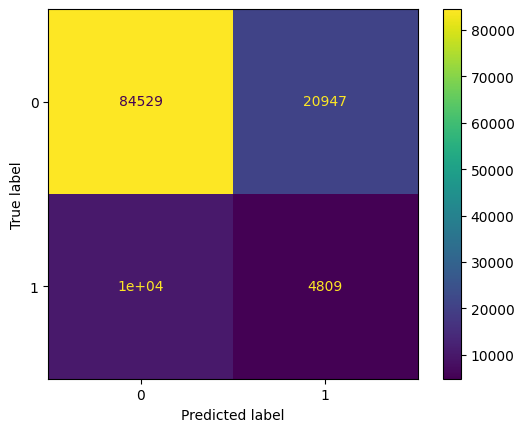

In [58]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [52]:
pd.DataFrame(clf.feature_importances_, index=features).sort_values(by=0, ascending=False)

,0
month,0.261438
population,0.227703
hour,0.198243
day_of_week,0.177584
weather_conditions,0.056128
speed_limit,0.043987
light_conditions,0.034917


In [ ]:
#https://towardsdatascience.com/step-by-step-tutorial-of-sci-kit-learn-pipeline-62402d5629b6
#https://imbalanced-learn.org/dev/over_sampling.html